# Conditional Neural Processes (CNP) for Coherent.
[Conditional Neural Processes](https://arxiv.org/pdf/1807.01613.pdf) (CNPs) were
introduced as a continuation of
[Generative Query Networks](https://deepmind.com/blog/neural-scene-representation-and-rendering/)
(GQN) to extend its training regime to tasks beyond scene rendering, e.g. to
regression and classification.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import datetime
import numpy as np
import pandas as pd
import os
from resum.utilities import plotting_utils_cnp as plotting
from resum.utilities import utilities as utils
from resum.conditional_neural_process import DataGeneration
from resum.conditional_neural_process import DeterministicModel
from torch.utils.tensorboard import SummaryWriter
import csv
import yaml

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
with open("../coherent/settings_newdata.yaml", "r") as f:
    config_file = yaml.safe_load(f)

PLOT_AFTER = int(config_file["cnp_settings"]["plot_after"])
torch.manual_seed(0)
FILES_PER_BATCH = config_file["cnp_settings"]["files_per_batch_predict"]
target_range = config_file["simulation_settings"]["target_range"]
is_binary = target_range[0] >= 0 and target_range[1] <= 1

path_out  = config_file["path_settings"]["path_out_cnp"]
version   = config_file["path_settings"]["version"]
iteration = config_file["path_settings"]["iteration"]
fidelity  = config_file["path_settings"]["fidelity"]

In [4]:
x_size, y_size = utils.get_feature_and_label_size(config_file)
theta_size=len(config_file["simulation_settings"]["theta_headers"])

In [5]:
d_x, d_in, representation_size, d_out = x_size , x_size+y_size, 32, y_size+1
encoder_sizes = [d_in, 32, 64, 128, 128, 128, 64, 48, representation_size]
decoder_sizes = [representation_size + d_x, 32, 64, 128, 128, 128, 64, 48, d_out]

model = DeterministicModel(encoder_sizes,decoder_sizes)
model.load_state_dict(torch.load(f'{path_out}/cnp_{version}_model_20epochs.pth'))
model.eval()

DeterministicModel(
  (_encoder): DeterministicEncoder(
    (linears): ModuleList(
      (0): Linear(in_features=11, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3-4): 2 x Linear(in_features=128, out_features=128, bias=True)
      (5): Linear(in_features=128, out_features=64, bias=True)
      (6): Linear(in_features=64, out_features=48, bias=True)
      (7): Linear(in_features=48, out_features=32, bias=True)
    )
  )
  (_decoder): DeterministicDecoder(
    (linears): ModuleList(
      (0): Linear(in_features=42, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3-4): 2 x Linear(in_features=128, out_features=128, bias=True)
      (5): Linear(in_features=128, out_features=64, bias=True)
      (6): Linear(in_features=64, out_features=48, bias=True)
      (7): Linear(

Batch :0
2025-07-23 01:03:37 Iteration: 0/0, train loss: 0.6931 (vs BCE 0.4063)


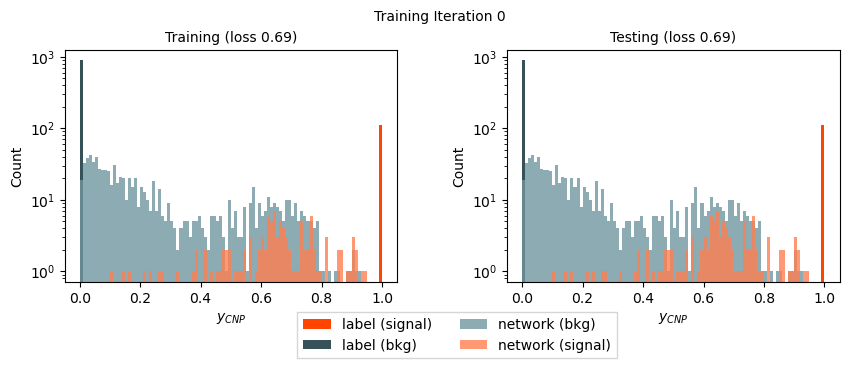

Batch :1
Batch :2
Batch :3
Batch :4
Batch :5
Batch :6
Batch :7
Batch :8
Batch :9
Batch :10
Batch :11
Batch :12
Batch :13
Batch :14
Batch :15
Batch :16
Batch :17
Batch :18
Batch :19
Batch :20
Batch :21
Batch :22
Batch :23
Batch :24
Batch :25
Batch :26
Batch :27
Batch :28
Batch :29
Batch :30
Batch :31
Batch :32
Batch :33
Batch :34
Batch :35
Batch :36
Batch :37
Batch :38
Batch :39
Batch :40
Batch :41
Batch :42
Batch :43
Batch :44
Batch :45
Batch :46
Batch :47
Batch :48
Batch :49
Batch :50
Batch :51
Batch :52
Batch :53
Batch :54
Batch :55
Batch :56
Batch :57
Batch :58
Batch :59
Batch :60
Batch :61
Batch :62
Batch :63
Batch :64
Batch :65
Batch :66
Batch :67
Batch :68
Batch :69
Batch :70
Batch :71
Batch :72
Batch :73
Batch :74
Batch :75
Batch :76
Batch :77
Batch :78
Batch :79
Batch :80
Batch :81
Batch :82
Batch :83
Batch :84
Batch :85
Batch :86
Batch :87
Batch :88
Batch :89
Batch :90
Batch :91
Batch :92
Batch :93
Batch :94
Batch :95
Batch :96
Batch :97
Batch :98
Batch :99
Batch :100
Batch :1

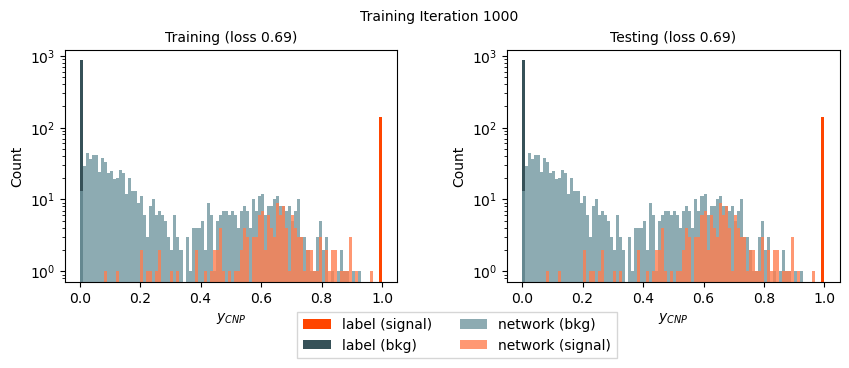

Batch :1001
Batch :1002
Batch :1003
Batch :1004
Batch :1005
Batch :1006
Batch :1007
Batch :1008
Batch :1009
Batch :1010
Batch :1011
Batch :1012
Batch :1013
Batch :1014
Batch :1015
Batch :1016
Batch :1017
Batch :1018
Batch :1019
Batch :1020
Batch :1021
Batch :1022
Batch :1023
Batch :1024
Batch :1025
Batch :1026
Batch :1027
Batch :1028
Batch :1029
Batch :1030
Batch :1031
Batch :1032
Batch :1033
Batch :1034
Batch :1035
Batch :1036
Batch :1037
Batch :1038
Batch :1039
Batch :1040
Batch :1041
Batch :1042
Batch :1043
Batch :1044
Batch :1045
Batch :1046
Batch :1047
Batch :1048
Batch :1049
Batch :1050
Batch :1051
Batch :1052
Batch :1053
Batch :1054
Batch :1055
Batch :1056
Batch :1057
Batch :1058
Batch :1059
Batch :1060
Batch :1061
Batch :1062
Batch :1063
Batch :1064
Batch :1065
Batch :1066
Batch :1067
Batch :1068
Batch :1069
Batch :1070
Batch :1071
Batch :1072
Batch :1073
Batch :1074
Batch :1075
Batch :1076
Batch :1077
Batch :1078
Batch :1079
Batch :1080
Batch :1081
Batch :1082
Batch :1083
Batc

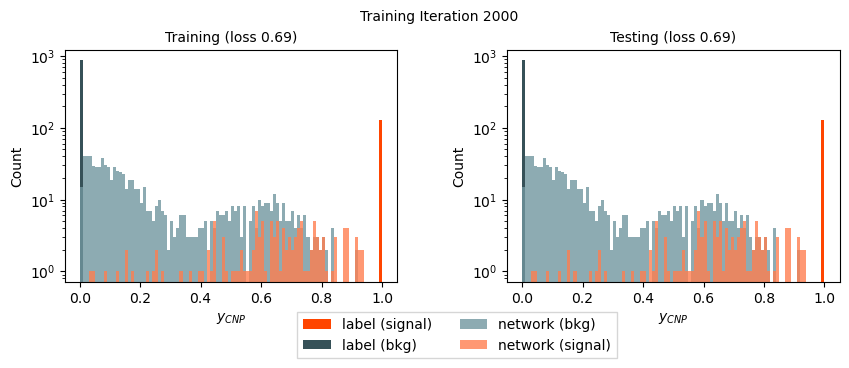

Batch :2001
Batch :2002
Batch :2003
Batch :2004
Batch :2005
Batch :2006
Batch :2007
Batch :2008
Batch :2009
Batch :2010
Batch :2011
Batch :2012
Batch :2013
Batch :2014
Batch :2015
Batch :2016
Batch :2017
Batch :2018
Batch :2019
Batch :2020
Batch :2021
Batch :2022
Batch :2023
Batch :2024
Batch :2025
Batch :2026
Batch :2027
Batch :2028
Batch :2029
Batch :2030
Batch :2031
Batch :2032
Batch :2033
Batch :2034
Batch :2035
Batch :2036
Batch :2037
Batch :2038
Batch :2039
Batch :2040
Batch :2041
Batch :2042
Batch :2043
Batch :2044
Batch :2045
Batch :2046
Batch :2047
Batch :2048
Batch :2049
Batch :2050
Batch :2051
Batch :2052
Batch :2053
Batch :2054
Batch :2055
Batch :2056
Batch :2057
Batch :2058
Batch :2059
Batch :2060
Batch :2061
Batch :2062
Batch :2063
Batch :2064
Batch :2065
Batch :2066
Batch :2067
Batch :2068
Batch :2069
Batch :2070
Batch :2071
Batch :2072
Batch :2073
Batch :2074
Batch :2075
Batch :2076
Batch :2077
Batch :2078
Batch :2079
Batch :2080
Batch :2081
Batch :2082
Batch :2083
Batc

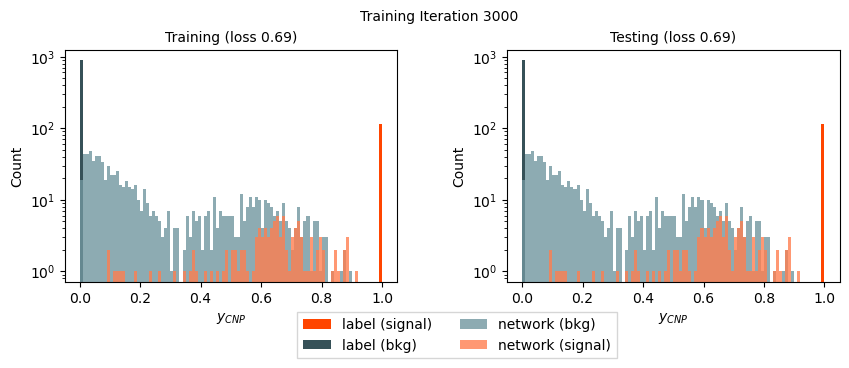

Batch :3001
Batch :3002
Batch :3003
Batch :3004
Batch :3005
Batch :3006
Batch :3007
Batch :3008
Batch :3009
Batch :3010
Batch :3011
Batch :3012
Batch :3013
Batch :3014
Batch :3015
Batch :3016
Batch :3017
Batch :3018
Batch :3019
Batch :3020
Batch :3021
Batch :3022
Batch :3023
Batch :3024
Batch :3025
Batch :3026
Batch :3027
Batch :3028
Batch :3029
Batch :3030
Batch :3031
Batch :3032
Batch :3033
Batch :3034
Batch :3035
Batch :3036
Batch :3037
Batch :3038
Batch :3039
Batch :3040
Batch :3041
Batch :3042
Batch :3043
Batch :3044
Batch :3045
Batch :3046
Batch :3047
Batch :3048
Batch :3049
Batch :3050
Batch :3051
Batch :3052
Batch :3053
Batch :3054
Batch :3055
Batch :3056
Batch :3057
Batch :3058
Batch :3059
Batch :3060
Batch :3061
Batch :3062
Batch :3063
Batch :3064
Batch :3065
Batch :3066
Batch :3067
Batch :3068
Batch :3069
Batch :3070
Batch :3071
Batch :3072
Batch :3073
Batch :3074
Batch :3075
Batch :3076
Batch :3077
Batch :3078
Batch :3079
Batch :3080
Batch :3081
Batch :3082
Batch :3083
Batc

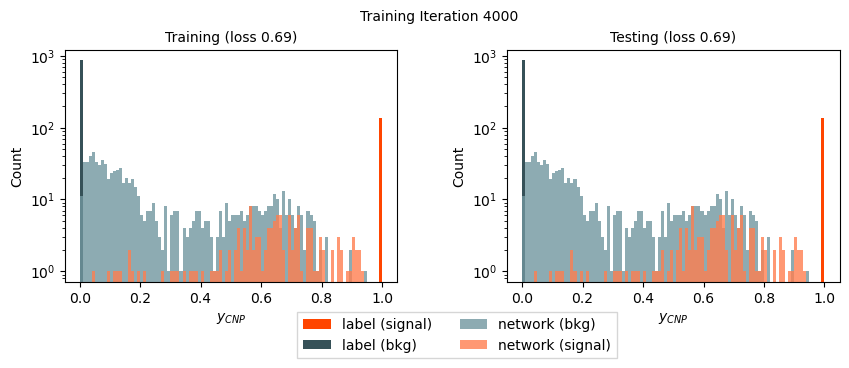

Batch :4001
Batch :4002
Batch :4003
Batch :4004
Batch :4005
Batch :4006
Batch :4007
Batch :4008
Batch :4009
Batch :4010
Batch :4011
Batch :4012
Batch :4013
Batch :4014
Batch :4015
Batch :4016
Batch :4017
Batch :4018
Batch :4019
Batch :4020
Batch :4021
Batch :4022
Batch :4023
Batch :4024
Batch :4025
Batch :4026
Batch :4027
Batch :4028
Batch :4029
Batch :4030
Batch :4031
Batch :4032
Batch :4033
Batch :4034
Batch :4035
Batch :4036
Batch :4037
Batch :4038
Batch :4039
Batch :4040
Batch :4041
Batch :4042
Batch :4043
Batch :4044
Batch :4045
Batch :4046
Batch :4047
Batch :4048
Batch :4049
Batch :4050
Batch :4051
Batch :4052
Batch :4053
Batch :4054
Batch :4055
Batch :4056
Batch :4057
Batch :4058
Batch :4059
Batch :4060
Batch :4061
Batch :4062
Batch :4063
Batch :4064
Batch :4065
Batch :4066
Batch :4067
Batch :4068
Batch :4069
Batch :4070
Finished full dataset pass. Starting new epoch! 
Batch :4071
Batch :4072
Batch :4073
Batch :4074
Batch :4075
Batch :4076
Batch :4077
Batch :4078
Batch :4079
Bat

In [6]:
bce = nn.BCELoss()

# create a PdfPages object
test_idx=0
it_batch = 0

with open(f'{path_out}/cnp_{version}_output_20epochs_hf.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    headers = ['iteration','fidelity','n_samples'] + [*config_file["simulation_settings"]["theta_headers"]] + ['y_cnp', 'y_cnp_err', 'y_raw', 'log_prop','bce']
    writer.writerow(headers)

for p, path in enumerate(config_file["path_settings"]["path_to_files_predict"]):
    USE_DATA_AUGMENTATION = False
    # load data:

    dataset_predict = DataGeneration(mode = "testing", config_file=config_file, 
                                   path_to_files=path, 
                                   use_data_augmentation=USE_DATA_AUGMENTATION, 
                                   batch_size=config_file["cnp_settings"]["batch_size_predict"][p], 
                                   files_per_batch=FILES_PER_BATCH)
    dataset_predict.set_loader()
    dataloader_predict = dataset_predict.dataloader

    # Shuffle the files in the dataset for randomized prediction order
    dataloader_predict.dataset.shuffle_files()

    for b, batch in enumerate(dataloader_predict):
        # Safety check: Skip empty batches
        if batch.numel() == 0:
            print(f"Warning: Skipping empty batch at iteration {b}")
            continue
            
        batch_formated=dataset_predict.format_batch_for_cnp(batch,config_file["cnp_settings"]["context_is_subset"] )
        # Get the predicted mean and variance at the target points for the testing set
        log_prob, mu, sigma = model(batch_formated.query, batch_formated.target_y, is_binary)
        
        # Define the loss
        loss = -log_prob.mean()
        
        if is_binary:
            loss_bce = bce(mu, batch_formated.target_y)
        else:
            loss_bce=-1

        
        mu=mu[0].detach().numpy()
        sigma = sigma[0].detach().numpy()

        theta=batch_formated.query[1][0].detach().numpy()
        print(f"Batch :{it_batch}")
        row = np.array([iteration[p]] + [fidelity[p]] + [len(mu)] + theta[0,:theta_size].tolist() + [np.mean(mu), np.sqrt(np.sum(sigma**2)) / len(sigma), np.mean(batch_formated.target_y.detach().numpy()),loss.item(), loss_bce.item()])
        # Reshape to 2D array (one row)
        row = row.reshape(1, -1)

        # Write the row to the CSV file with 5 decimal places for each number
        with open(f'{path_out}/cnp_{version}_output_20epochs_hf.csv', mode='a', newline='') as file:
            np.savetxt(file, row, delimiter=",", fmt="%.5f")

        if it_batch % PLOT_AFTER == 0:
            mu_predict=mu
            loss_predict=loss
            print('{} Iteration: {}/{}, train loss: {:.4f} (vs BCE {:.4f})'.format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),p, it_batch,loss, loss_bce))
            if y_size ==1:
                    fig = plotting.plot(mu, batch_formated.target_y[0].detach().numpy(), f'{loss:.2f}', mu_predict, batch_formated.target_y[0].detach().numpy(), f'{loss_predict:.2f}', target_range, it_batch)
            else:
                for k in range(y_size):
                        fig = plotting.plot(mu[:,k], batch_formated.target_y[0].detach().numpy()[:,k], f'{loss:.2f}', mu_predict[:,k], batch_formated.target_y[0].detach().numpy()[:,k], f'{loss_predict:.2f}', target_range, it_batch)
                        
        it_batch+=1


Marginalized plots saved to: ../coherent/out/cnp/newdata/cnp_v102.0_coherent_output_1epochs.png


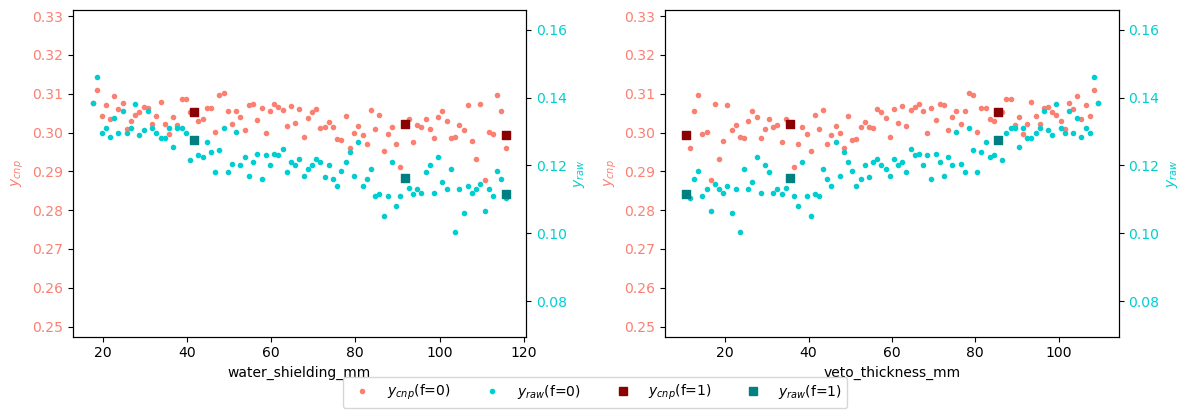

In [7]:
# Generate marginalized plots for all parameters
try:
    fig = plotting.get_marginialized_all(config_file=config_file)
    fig.savefig(f'{path_out}/cnp_{version}_output_20epochs.png', dpi=300, bbox_inches='tight')
    print(f"Marginalized plots saved to: {path_out}/cnp_{version}_output_1epochs.png")
except Exception as e:
    print(f"Error generating marginalized plots: {e}")
    import traceback
    traceback.print_exc()

In [ ]:
import os

# Rename the coherent output file to include 20epochs_hf suffix
old_file = '/home/bliu4/resum-coherent2/examples/coherent/out/cnp/cnp_v102.0_coherent_output.csv'
new_file = '/home/bliu4/resum-coherent2/examples/coherent/out/cnp/cnp_v102.0_coherent_output_20epochs_hf.csv'

if os.path.exists(old_file):
    os.rename(old_file, new_file)
    print(f"File renamed successfully:")
    print(f"From: {old_file}")
    print(f"To: {new_file}")
else:
    print(f"Source file not found: {old_file}")
    # Check if the target file already exists
    if os.path.exists(new_file):
        print(f"Target file already exists: {new_file}")
    else:
        print("Neither source nor target file exists.")
